1. Import all required libraries

In [2]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ All libraries imported successfully!")


✓ All libraries imported successfully!


2. Load the Samsung product dataset

In [4]:
# Load the Samsung product dataset
df = pd.read_csv('Samsung.csv')

print("Dataset Loaded Successfully!")
print("="*40)
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")

Dataset Loaded Successfully!
Dataset Shape: (3608, 11)
Total Records: 3608
Total Columns: 11


3. Display first 10 rows of the dataset

In [6]:
# Display first 10 rows of the dataset
print("First 10 Rows of Dataset:")
df.head(10)

First 10 Rows of Dataset:


,product_id,Screen_Appearance,Voice_Clarity,Signal_Receiving_Strength,App_Comaptiability,product_length,product_width,product_thickness,Overall_Quality,Unnamed: 9,Unnamed: 10
0,159455,Good,Good,AboveAverage,Poor,5.95,2.63,0.380,Good,NaN,NaN
1,168750,VeryGood,BelowAverage,VeryPoor,Average,4.41,2.20,0.358,Poor,NaN,NaN
2,161960,VeryGood,Poor,Excellent,VeryPoor,4.33,2.48,0.362,Good,NaN,NaN
3,190602,Poor,BelowAverage,VeryGood,SlightlyPoor,4.31,1.97,0.325,Poor,NaN,NaN
4,203507,BelowAverage,AboveAverage,SlightlyGood,VeryGood,4.78,2.11,0.373,Good,NaN,NaN
5,194863,Good,AboveAverage,Average,AboveAverage,4.33,2.47,0.328,Good,NaN,NaN
6,170468,Excellent,BelowAverage,VeryPoor,SlightlyGood,4.60,1.89,0.360,Good,NaN,`
7,148712,BelowAverage,SlightlyGood,Excellent,AboveAverage,6.19,2.26,0.352,Good,NaN,NaN
8,180012,Average,Poor,Average,Excellent,5.45,2.74,0.336,Good,NaN,NaN
9,171015,AboveAverage,Excellent,VeryPoor,VeryGood,6.10,2.02,0.383,Good,NaN,NaN


4. Display information

In [8]:
# Display dataset information
print("Dataset Information:")
print("="*60)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3608 entries, 0 to 3607
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   product_id                 3608 non-null   int64  
 1   Screen_Appearance          3608 non-null   object 
 2   Voice_Clarity              3608 non-null   object 
 3   Signal_Receiving_Strength  3608 non-null   object 
 4   App_Comaptiability         3608 non-null   object 
 5   product_length             3608 non-null   float64
 6   product_width              3608 non-null   float64
 7   product_thickness          3608 non-null   float64
 8   Overall_Quality            3608 non-null   object 
 9   Unnamed: 9                 0 non-null      float64
 10  Unnamed: 10                1 non-null      object 
dtypes: float64(4), int64(1), object(6)
memory usage: 310.2+ KB


5. Check missing values in each column

In [10]:
# Check missing values in each column
print("Missing Values in Each Column:")
print("=" * 60)
print(df.isnull().sum())

Missing Values in Each Column:
product_id                      0
Screen_Appearance               0
Voice_Clarity                   0
Signal_Receiving_Strength       0
App_Comaptiability              0
product_length                  0
product_width                   0
product_thickness               0
Overall_Quality                 0
Unnamed: 9                   3608
Unnamed: 10                  3607
dtype: int64


6. Statistical Summary of Numerical Features

In [12]:
# Statistical summary
print("Statistical Summary of Numerical Features:")
print("=" * 60)
df.describe()

Statistical Summary of Numerical Features:


,product_id,product_length,product_width,product_thickness,Unnamed: 9
count,3608.000000,3608.000000,3608.000000,3608.00000,0.0
mean,162809.334257,5.204534,2.318653,0.34779,NaN
std,29834.297035,0.579722,0.333426,0.02906,NaN
min,111241.000000,4.200000,1.750000,0.29800,NaN
25%,137334.250000,4.707500,2.030000,0.32200,NaN
50%,162120.500000,5.200000,2.320000,0.34700,NaN
75%,188721.000000,5.710000,2.610000,0.37300,NaN
max,214675.000000,6.200000,2.900000,0.39800,NaN


7. Target Variable Distribution

In [14]:
# Target variable distribution
print("Overall Quality Distribution:")
print("="*60)
print(df['Overall_Quality'].value_counts())
print("\nPercentage Distribution:")
print(df['Overall_Quality'].value_counts(normalize=True) * 100)

Overall Quality Distribution:
Overall_Quality
Good        1890
Poor        1462
VeryGood     256
Name: count, dtype: int64

Percentage Distribution:
Overall_Quality
Good        52.383592
Poor        40.521064
VeryGood     7.095344
Name: proportion, dtype: float64


8. Visualize Target Variable Distribution

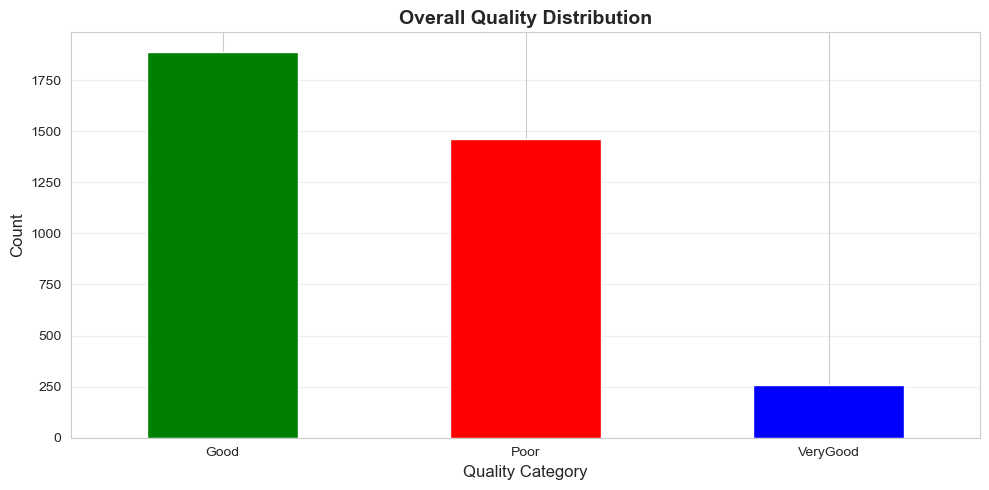

In [16]:
# Visualize target variable
plt.figure(figsize=(10, 5))
df['Overall_Quality'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Overall Quality Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Quality Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

9. Analyze Categorical Features

In [18]:
# Analyze categorical features
categorical_features = ['Screen_Appearance', 'Voice_Clarity', 'Signal_Receiving_Strength', 'App_Comaptiability']

print("Categorical Features Analysis:")
print("="*60)
for feature in categorical_features:
    print(f"\n{feature}:")
    print(f"  Unique Values: {df[feature].nunique()}")
    print(f"  Top 5 Values:\n{df[feature].value_counts().head()}")

Categorical Features Analysis:

Screen_Appearance:
  Unique Values: 10
  Top 5 Values:
Screen_Appearance
Good            391
Poor            385
SlightlyPoor    383
Excellent       365
Average         364
Name: count, dtype: int64

Voice_Clarity:
  Unique Values: 10
  Top 5 Values:
Voice_Clarity
SlightlyGood    371
Poor            370
AboveAverage    369
SlightlyPoor    367
Average         365
Name: count, dtype: int64

Signal_Receiving_Strength:
  Unique Values: 10
  Top 5 Values:
Signal_Receiving_Strength
Average         385
SlightlyPoor    377
Excellent       373
Good            367
VeryGood        360
Name: count, dtype: int64

App_Comaptiability:
  Unique Values: 10
  Top 5 Values:
App_Comaptiability
VeryGood        395
Poor            373
VeryPoor        369
SlightlyGood    369
Average         365
Name: count, dtype: int64


10. Visualize Categorical Features

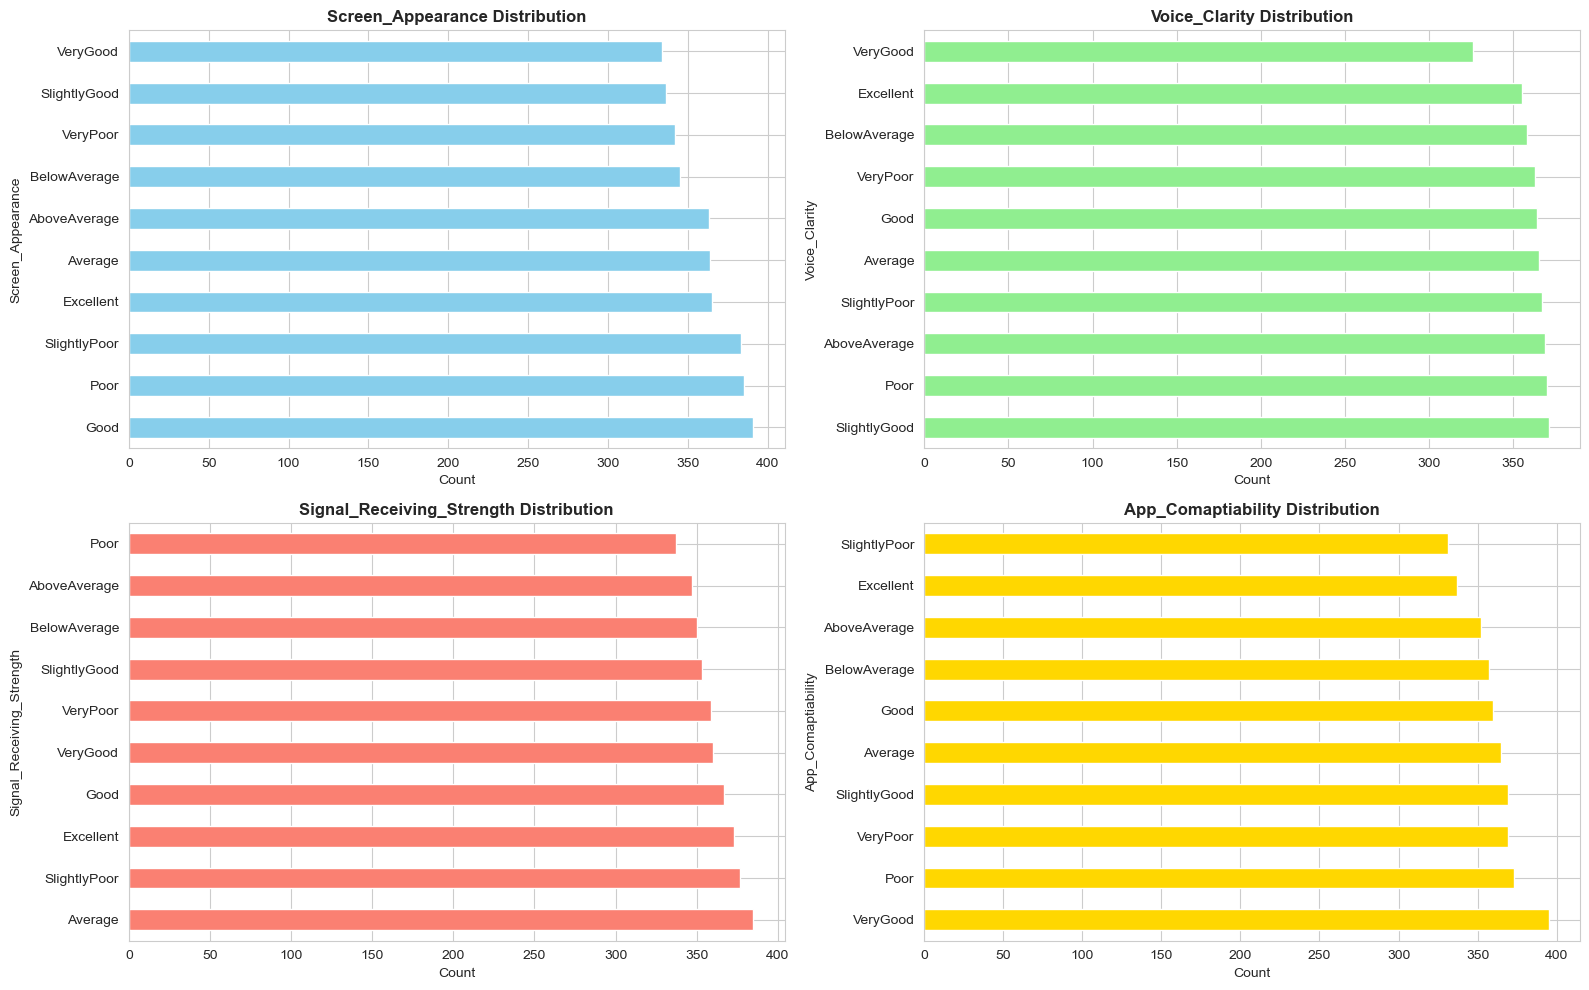

In [20]:
# Visualize categorical features
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

colors = ['skyblue', 'lightgreen', 'salmon', 'gold']

for idx, feature in enumerate(categorical_features):
    df[feature].value_counts().plot(kind='barh', ax=axes[idx], color=colors[idx])
    axes[idx].set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Count')
    axes[idx].set_ylabel(feature)

plt.tight_layout()
plt.show()

11. Analyze Numerical Features

In [22]:
# Analyze numerical features
numerical_features = ['product_length', 'product_width', 'product_thickness']

print("Numerical Features Statistics:")
print("="*60)
print(df[numerical_features].describe())

Numerical Features Statistics:
       product_length  product_width  product_thickness
count     3608.000000    3608.000000         3608.00000
mean         5.204534       2.318653            0.34779
std          0.579722       0.333426            0.02906
min          4.200000       1.750000            0.29800
25%          4.707500       2.030000            0.32200
50%          5.200000       2.320000            0.34700
75%          5.710000       2.610000            0.37300
max          6.200000       2.900000            0.39800


12. Visualize Numerical Features Distribution

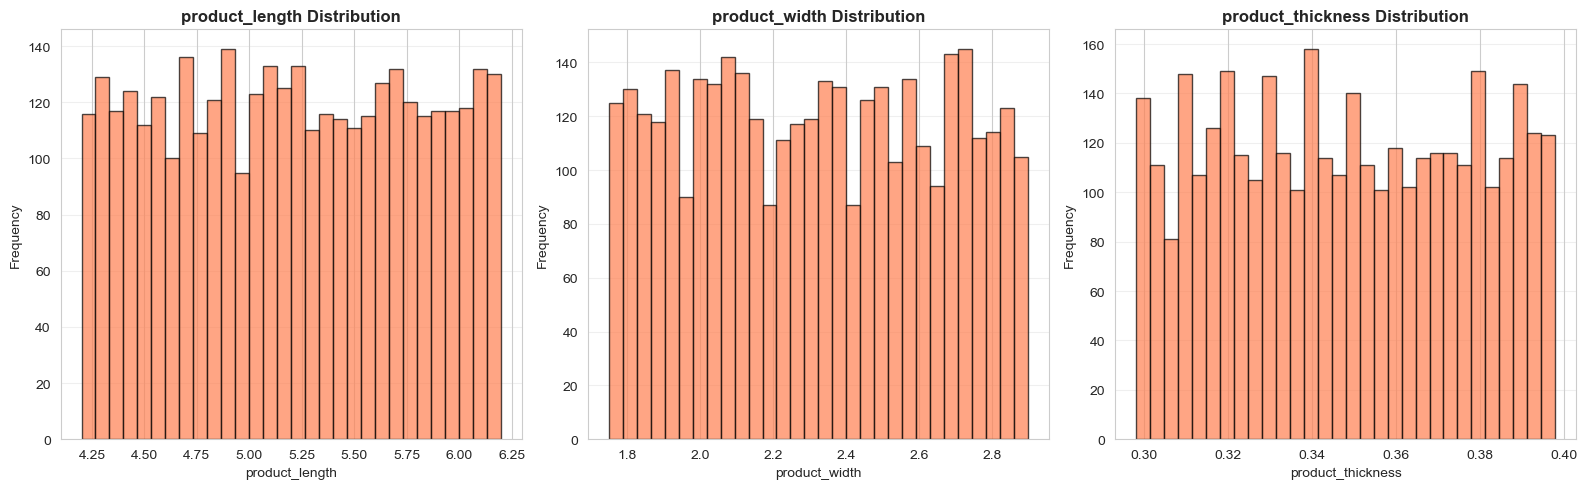

In [24]:
# Visualize numerical features
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, feature in enumerate(numerical_features):
    axes[idx].hist(df[feature], bins=30, color='coral', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

13. Remove Unnecessary Columns

In [26]:
# Create a copy and remove unnecessary columns
df_clean = df.copy()
columns_to_drop = ['product_id', 'Unnamed: 9', 'Unnamed: 10']
df_clean = df_clean.drop(columns=columns_to_drop, errors='ignore')

print("Columns Removed:")
print(columns_to_drop)
print(f"\nNew Dataset Shape: {df_clean.shape}")
print(f"Remaining Columns: {list(df_clean.columns)}")

Columns Removed:
['product_id', 'Unnamed: 9', 'Unnamed: 10']

New Dataset Shape: (3608, 8)
Remaining Columns: ['Screen_Appearance', 'Voice_Clarity', 'Signal_Receiving_Strength', 'App_Comaptiability', 'product_length', 'product_width', 'product_thickness', 'Overall_Quality']


14. Encode Categorical Features

In [28]:
# Define quality-based ordinal encoding
quality_mapping = {
    'VeryPoor': 1,
    'Poor': 2,
    'BelowAverage': 3,
    'SlightlyPoor': 4,
    'Average': 5,
    'SlightlyGood': 6,
    'Good': 7,
    'AboveAverage': 8,
    'VeryGood': 9,
    'Excellent': 10
}

# Apply encoding to categorical features
print("Encoding Categorical Features:")
print("="*60)

df_clean['Screen_Appearance'] = df_clean['Screen_Appearance'].map(quality_mapping)
df_clean['Voice_Clarity'] = df_clean['Voice_Clarity'].map(quality_mapping)
df_clean['Signal_Receiving_Strength'] = df_clean['Signal_Receiving_Strength'].map(quality_mapping)
df_clean['App_Comaptiability'] = df_clean['App_Comaptiability'].map(quality_mapping)

print("✓ Screen_Appearance encoded")
print("✓ Voice_Clarity encoded")
print("✓ Signal_Receiving_Strength encoded")
print("✓ App_Comaptiability encoded")
print("\nEncoded Dataset Preview:")
df_clean.head()

Encoding Categorical Features:
✓ Screen_Appearance encoded
✓ Voice_Clarity encoded
✓ Signal_Receiving_Strength encoded
✓ App_Comaptiability encoded

Encoded Dataset Preview:


,Screen_Appearance,Voice_Clarity,Signal_Receiving_Strength,App_Comaptiability,product_length,product_width,product_thickness,Overall_Quality
0,7,7,8,2,5.95,2.63,0.380,Good
1,9,3,1,5,4.41,2.20,0.358,Poor
2,9,2,10,1,4.33,2.48,0.362,Good
3,2,3,9,4,4.31,1.97,0.325,Poor
4,3,8,6,9,4.78,2.11,0.373,Good


15. Encode Target Variable

In [30]:
# Encode target variable
label_encoder = LabelEncoder()
df_clean['Overall_Quality'] = label_encoder.fit_transform(df_clean['Overall_Quality'])

print("Target Variable Encoding:")
print("="*60)
target_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
for original, encoded in target_mapping.items():
    print(f"  {original} → {encoded}")

print("\n✓ Target variable encoded successfully!")

Target Variable Encoding:
  Good → 0
  Poor → 1
  VeryGood → 2

✓ Target variable encoded successfully!


16. Separate Features and Target

In [32]:
# Separate features (X) and target (y)
X = df_clean.drop('Overall_Quality', axis=1)
y = df_clean['Overall_Quality']

print("Features and Target Separated:")
print("="*60)
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nFeature Columns: {list(X.columns)}")

Features and Target Separated:
Features (X) shape: (3608, 7)
Target (y) shape: (3608,)

Feature Columns: ['Screen_Appearance', 'Voice_Clarity', 'Signal_Receiving_Strength', 'App_Comaptiability', 'product_length', 'product_width', 'product_thickness']


17. Split Dataset into Training and Testing Sets

In [34]:
# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("Dataset Split Complete:")
print("="*60)
print(f"Training Set: {X_train.shape[0]} samples ({(len(X_train)/len(X))*100:.1f}%)")
print(f"Testing Set: {X_test.shape[0]} samples ({(len(X_test)/len(X))*100:.1f}%)")
print(f"\nTraining Features: {X_train.shape}")
print(f"Testing Features: {X_test.shape}")

Dataset Split Complete:
Training Set: 2886 samples (80.0%)
Testing Set: 722 samples (20.0%)

Training Features: (2886, 7)
Testing Features: (722, 7)


MODEL TRAINING AND EVALUATION

18. Train Logistic Regression Model

In [37]:
# Train Logistic Regression
print("Training Logistic Regression...")
print("="*60)

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

print("✓ Logistic Regression trained successfully!")
print(f"  Number of iterations: {lr_model.n_iter_}")
print(f"  Number of classes: {len(lr_model.classes_)}")

Training Logistic Regression...
✓ Logistic Regression trained successfully!
  Number of iterations: [382]
  Number of classes: 3


19. Evaluate Logistic Regression

In [39]:
# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Calculate metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, average='weighted', zero_division=0)
lr_recall = recall_score(y_test, y_pred_lr, average='weighted', zero_division=0)
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted', zero_division=0)

print("LOGISTIC REGRESSION - EVALUATION RESULTS")
print("="*60)
print(f"Accuracy:  {lr_accuracy*100:.2f}%")
print(f"Precision: {lr_precision*100:.2f}%")
print(f"Recall:    {lr_recall*100:.2f}%")
print(f"F1-Score:  {lr_f1*100:.2f}%")

LOGISTIC REGRESSION - EVALUATION RESULTS
Accuracy:  86.57%
Precision: 86.55%
Recall:    86.57%
F1-Score:  86.55%


20. Classification Report - Logistic Regression

In [41]:
# Display classification report
print("Classification Report - Logistic Regression:")
print("="*60)
print(classification_report(y_test, y_pred_lr, 
                          target_names=label_encoder.classes_, 
                          zero_division=0))

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

        Good       0.87      0.87      0.87       378
        Poor       0.87      0.88      0.88       293
    VeryGood       0.76      0.75      0.75        51

    accuracy                           0.87       722
   macro avg       0.84      0.83      0.83       722
weighted avg       0.87      0.87      0.87       722



21. Confusion Matrix - Logistic Regression

Confusion Matrix - Logistic Regression:
[[328  38  12]
 [ 34 259   0]
 [ 13   0  38]]


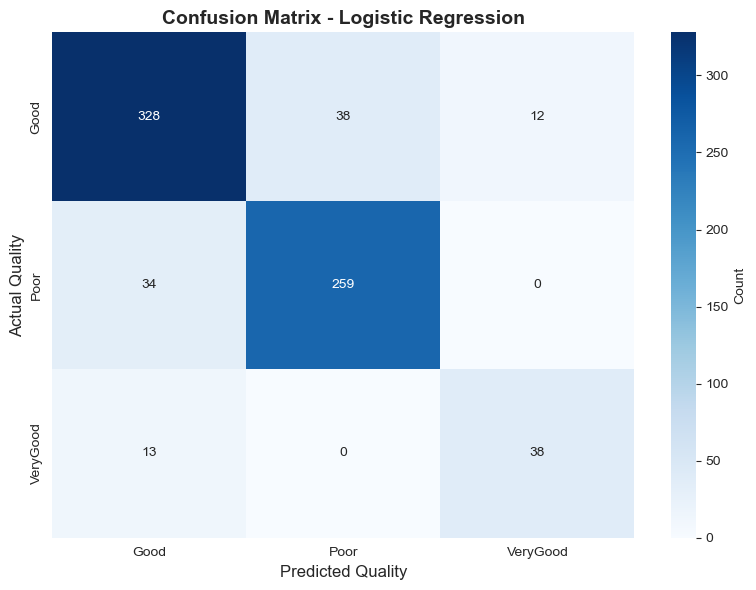

In [43]:
# Generate and visualize confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix - Logistic Regression:")
print(cm_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
plt.ylabel('Actual Quality', fontsize=12)
plt.xlabel('Predicted Quality', fontsize=12)
plt.tight_layout()
plt.show()

22. Train Decision Tree Model

In [45]:
# Train Decision Tree
print("Training Decision Tree Classifier...")
print("="*60)

dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model.fit(X_train, y_train)

print("✓ Decision Tree Classifier trained successfully!")
print(f"  Tree depth: {dt_model.get_depth()}")
print(f"  Number of leaves: {dt_model.get_n_leaves()}")

Training Decision Tree Classifier...
✓ Decision Tree Classifier trained successfully!
  Tree depth: 10
  Number of leaves: 294


23. Evaluate Decision Tree

In [47]:
# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='weighted', zero_division=0)
dt_recall = recall_score(y_test, y_pred_dt, average='weighted', zero_division=0)
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted', zero_division=0)

print("DECISION TREE - EVALUATION RESULTS")
print("="*60)
print(f"Accuracy:  {dt_accuracy*100:.2f}%")
print(f"Precision: {dt_precision*100:.2f}%")
print(f"Recall:    {dt_recall*100:.2f}%")
print(f"F1-Score:  {dt_f1*100:.2f}%")

DECISION TREE - EVALUATION RESULTS
Accuracy:  80.75%
Precision: 81.28%
Recall:    80.75%
F1-Score:  80.85%


24. Classification Report - Decision Tree

In [49]:
# Display classification report
print("Classification Report - Decision Tree:")
print("="*60)
print(classification_report(y_test, y_pred_dt, 
                          target_names=label_encoder.classes_, 
                          zero_division=0))

Classification Report - Decision Tree:
              precision    recall  f1-score   support

        Good       0.84      0.78      0.81       378
        Poor       0.81      0.87      0.84       293
    VeryGood       0.57      0.71      0.63        51

    accuracy                           0.81       722
   macro avg       0.74      0.78      0.76       722
weighted avg       0.81      0.81      0.81       722



25. Confusion Matrix - Decision Tree

Confusion Matrix - Decision Tree:
[[293  58  27]
 [ 39 254   0]
 [ 15   0  36]]


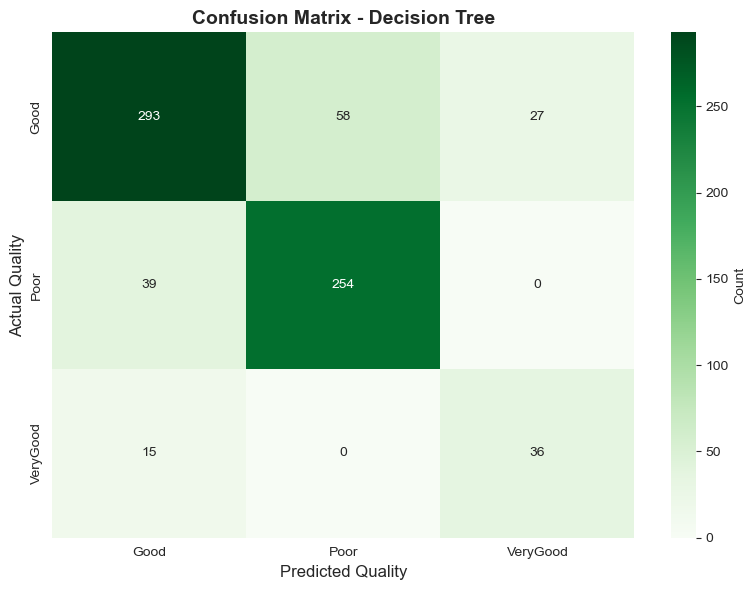

In [51]:
# Generate and visualize confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix - Decision Tree:")
print(cm_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', 
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Decision Tree', fontsize=14, fontweight='bold')
plt.ylabel('Actual Quality', fontsize=12)
plt.xlabel('Predicted Quality', fontsize=12)
plt.tight_layout()
plt.show()

26. Train Random Forest Model

In [53]:
# Train Random Forest
print("Training Random Forest Classifier...")
print("="*60)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=15)
rf_model.fit(X_train, y_train)

print("✓ Random Forest Classifier trained successfully!")
print(f"  Number of trees: {rf_model.n_estimators}")
print(f"  Number of features: {rf_model.n_features_in_}")

Training Random Forest Classifier...
✓ Random Forest Classifier trained successfully!
  Number of trees: 100
  Number of features: 7


27. Evaluate Random Forest

In [55]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
rf_recall = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

print("RANDOM FOREST - EVALUATION RESULTS")
print("="*60)
print(f"Accuracy:  {rf_accuracy*100:.2f}%")
print(f"Precision: {rf_precision*100:.2f}%")
print(f"Recall:    {rf_recall*100:.2f}%")
print(f"F1-Score:  {rf_f1*100:.2f}%")

RANDOM FOREST - EVALUATION RESULTS
Accuracy:  89.34%
Precision: 89.37%
Recall:    89.34%
F1-Score:  89.17%


28. Classification Report - Random Forest

In [57]:
# Display classification report
print("Classification Report - Random Forest:")
print("="*60)
print(classification_report(y_test, y_pred_rf, 
                          target_names=label_encoder.classes_, 
                          zero_division=0))

Classification Report - Random Forest:
              precision    recall  f1-score   support

        Good       0.88      0.92      0.90       378
        Poor       0.91      0.90      0.91       293
    VeryGood       0.89      0.63      0.74        51

    accuracy                           0.89       722
   macro avg       0.89      0.82      0.85       722
weighted avg       0.89      0.89      0.89       722



29. Confusion Matrix - Random Forest

Confusion Matrix - Random Forest:
[[349  25   4]
 [ 29 264   0]
 [ 19   0  32]]


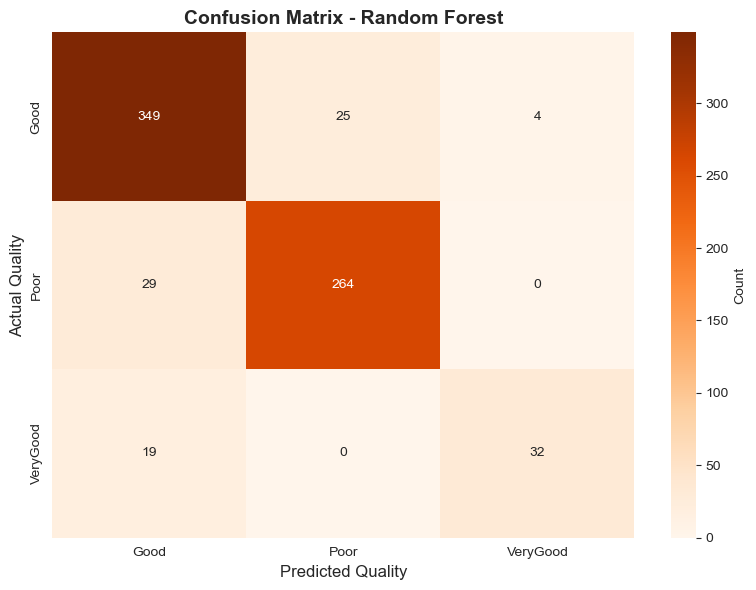

In [59]:
# Generate and visualize confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix - Random Forest:")
print(cm_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('Actual Quality', fontsize=12)
plt.xlabel('Predicted Quality', fontsize=12)
plt.tight_layout()
plt.show()

30. Feature Importance Analysis

Feature Importance (Random Forest):
                     Feature  Importance
3         App_Comaptiability    0.202431
2  Signal_Receiving_Strength    0.193567
0          Screen_Appearance    0.181230
1              Voice_Clarity    0.175019
4             product_length    0.084642
6          product_thickness    0.081933
5              product_width    0.081179


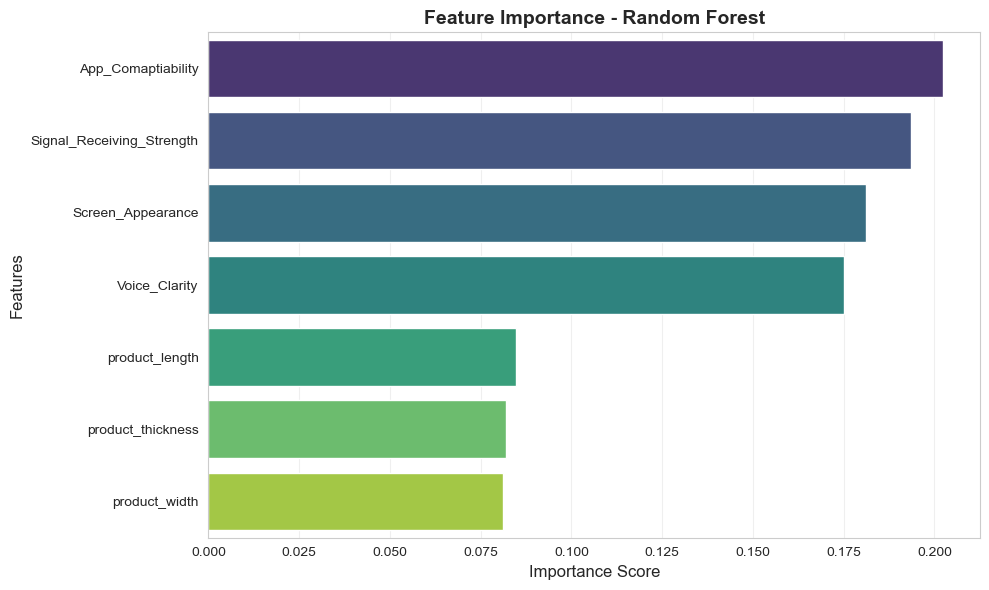

In [61]:
# Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance (Random Forest):")
print("="*60)
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

31. Compare Baseline Models & Select Best

In [63]:
# Create comparison table
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [lr_accuracy*100, dt_accuracy*100, rf_accuracy*100],
    'Precision': [lr_precision*100, dt_precision*100, rf_precision*100],
    'Recall': [lr_recall*100, dt_recall*100, rf_recall*100],
    'F1-Score': [lr_f1*100, dt_f1*100, rf_f1*100]
})

print("MODEL PERFORMANCE COMPARISON")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)

MODEL PERFORMANCE COMPARISON
              Model  Accuracy  Precision    Recall  F1-Score
Logistic Regression 86.565097  86.550663 86.565097 86.554997
      Decision Tree 80.747922  81.281261 80.747922 80.853455
      Random Forest 89.335180  89.374590 89.335180 89.165588


32. Visualize Model Comparison - Individual Metrics

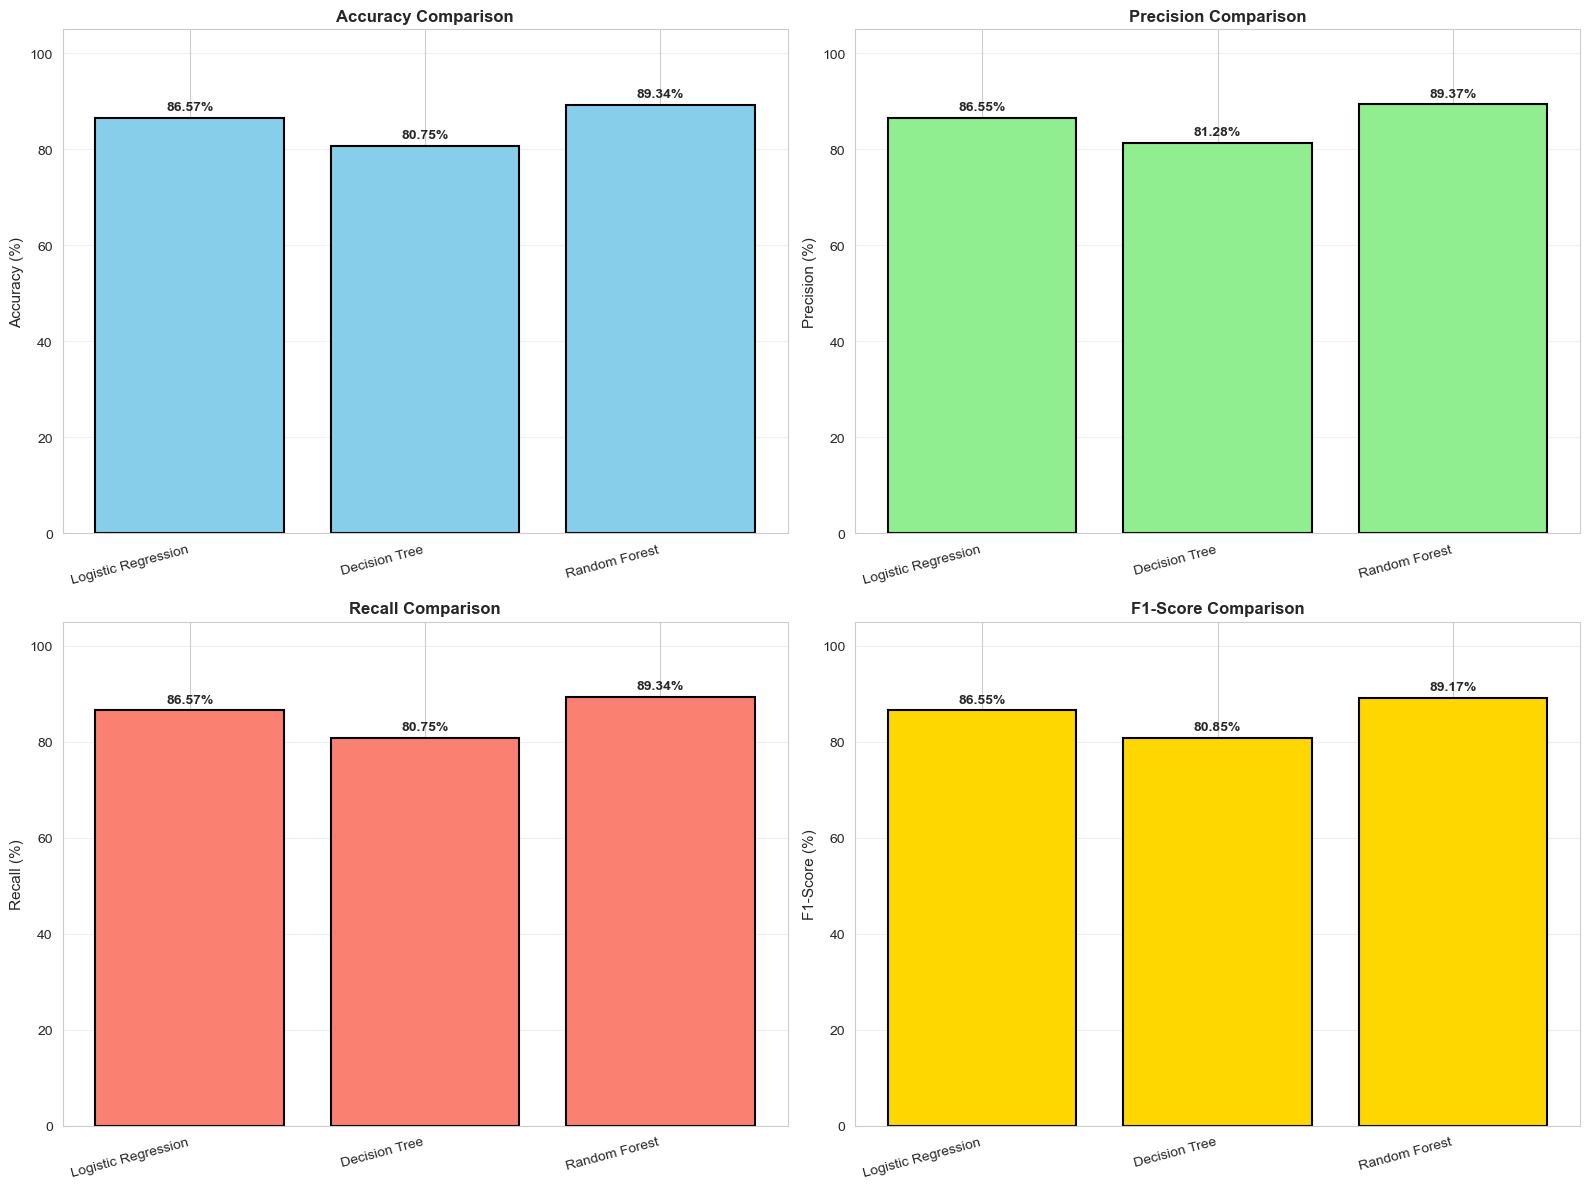

In [65]:
# Visualize individual metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightgreen', 'salmon', 'gold']

for idx, (ax, metric, color) in enumerate(zip(axes.ravel(), metrics, colors)):
    bars = ax.bar(comparison_df['Model'], comparison_df[metric], color=color, edgecolor='black', linewidth=1.5)
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.set_ylabel(f'{metric} (%)', fontsize=11)
    ax.set_ylim([0, 105])
    ax.set_xticklabels(comparison_df['Model'], rotation=15, ha='right')
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

33. Visualize Complete Comparison - All Models

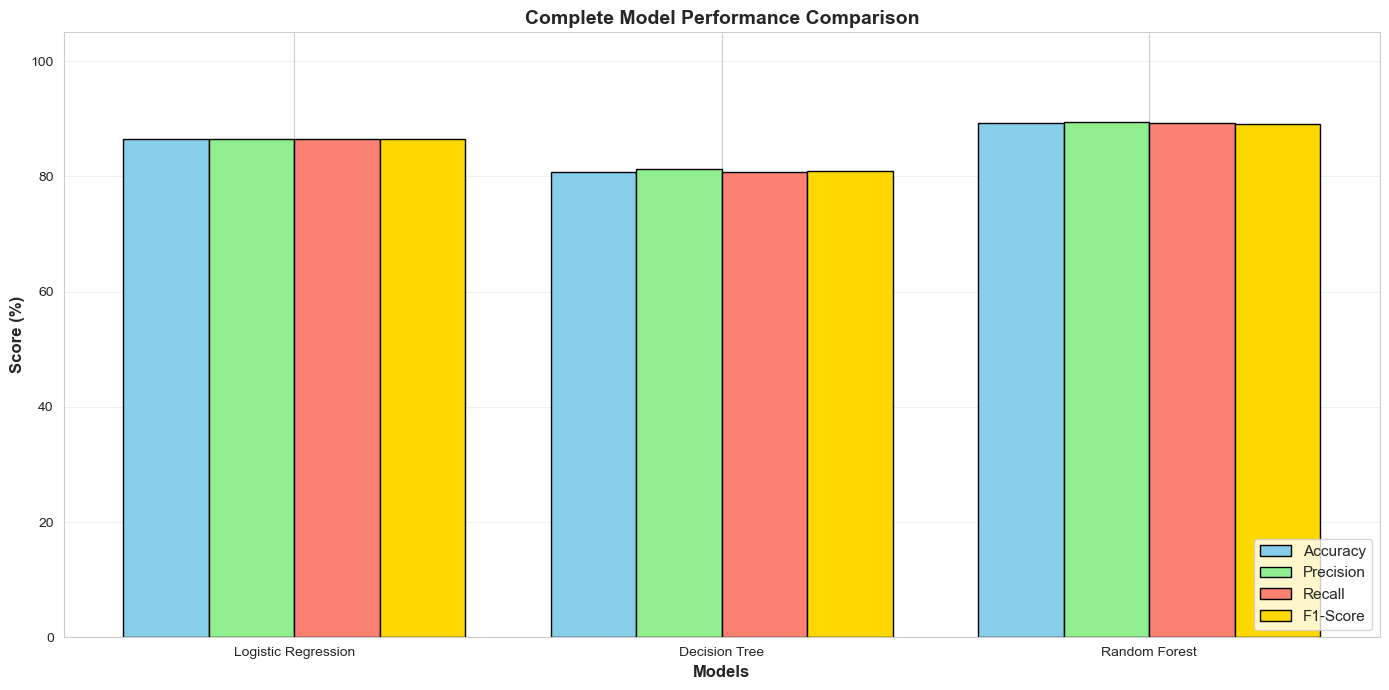

In [67]:
# Grouped bar chart for complete comparison
x = np.arange(len(comparison_df['Model']))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 7))

bars1 = ax.bar(x - 1.5*width, comparison_df['Accuracy'], width, label='Accuracy', color='skyblue', edgecolor='black')
bars2 = ax.bar(x - 0.5*width, comparison_df['Precision'], width, label='Precision', color='lightgreen', edgecolor='black')
bars3 = ax.bar(x + 0.5*width, comparison_df['Recall'], width, label='Recall', color='salmon', edgecolor='black')
bars4 = ax.bar(x + 1.5*width, comparison_df['F1-Score'], width, label='F1-Score', color='gold', edgecolor='black')

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Score (%)', fontsize=12, fontweight='bold')
ax.set_title('Complete Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'])
ax.legend(fontsize=11, loc='lower right')
ax.set_ylim([0, 105])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

34. Identify Best Model

In [69]:
# Find the best model based on accuracy
best_model_idx = comparison_df['Accuracy'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_accuracy = comparison_df.loc[best_model_idx, 'Accuracy']
best_precision = comparison_df.loc[best_model_idx, 'Precision']
best_recall = comparison_df.loc[best_model_idx, 'Recall']
best_f1 = comparison_df.loc[best_model_idx, 'F1-Score']

print("="*80)
print(" BEST PERFORMING MODEL")
print("="*80)
print(f"Model Name:  {best_model_name}")
print(f"Accuracy:    {best_accuracy:.2f}%")
print(f"Precision:   {best_precision:.2f}%")
print(f"Recall:      {best_recall:.2f}%")
print(f"F1-Score:    {best_f1:.2f}%")
print("="*80)


 BEST PERFORMING MODEL
Model Name:  Random Forest
Accuracy:    89.34%
Precision:   89.37%
Recall:      89.34%
F1-Score:    89.17%


CROSS-VALIDATION ANALYSIS

31. Cross-Validation - Logistic Regression

In [72]:
# Perform 5-Fold Cross Validation for Logistic Regression
print("Cross-Validation - Logistic Regression")
print("="*60)

cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores (5 Folds): {cv_scores_lr}")
print(f"Mean CV Accuracy: {cv_scores_lr.mean()*100:.2f}%")
print(f"Standard Deviation: {cv_scores_lr.std()*100:.2f}%")
print(f"\nThis indicates the model's consistency across different data splits.")

Cross-Validation - Logistic Regression
Cross-Validation Scores (5 Folds): [0.85813149 0.88041594 0.85961872 0.86828423 0.89254766]
Mean CV Accuracy: 87.18%
Standard Deviation: 1.31%

This indicates the model's consistency across different data splits.


32. Cross-Validation - Decision Tree

In [74]:
# Perform 5-Fold Cross Validation for Decision Tree
print("Cross-Validation - Decision Tree")
print("="*60)

cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores (5 Folds): {cv_scores_dt}")
print(f"Mean CV Accuracy: {cv_scores_dt.mean()*100:.2f}%")
print(f"Standard Deviation: {cv_scores_dt.std()*100:.2f}%")
print(f"\nThis indicates the model's consistency across different data splits.")

Cross-Validation - Decision Tree
Cross-Validation Scores (5 Folds): [0.83737024 0.82322357 0.79376083 0.83188908 0.82668977]
Mean CV Accuracy: 82.26%
Standard Deviation: 1.52%

This indicates the model's consistency across different data splits.


33. Cross-Validation - Random Forest

In [76]:
# Perform 5-Fold Cross Validation for Random Forest
print("Cross-Validation - Random Forest")
print("="*60)

cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores (5 Folds): {cv_scores_rf}")
print(f"Mean CV Accuracy: {cv_scores_rf.mean()*100:.2f}%")
print(f"Standard Deviation: {cv_scores_rf.std()*100:.2f}%")
print(f"\nThis indicates the model's consistency across different data splits.")

Cross-Validation - Random Forest
Cross-Validation Scores (5 Folds): [0.86678201 0.88561525 0.86135182 0.88041594 0.87868284]
Mean CV Accuracy: 87.46%
Standard Deviation: 0.90%

This indicates the model's consistency across different data splits.


34. Visualize Cross-Validation Results


Cross-Validation Summary:
              Model  Mean CV Score  Std Dev
Logistic Regression      87.179961 1.305582
      Decision Tree      82.258670 1.518722
      Random Forest      87.456957 0.903838


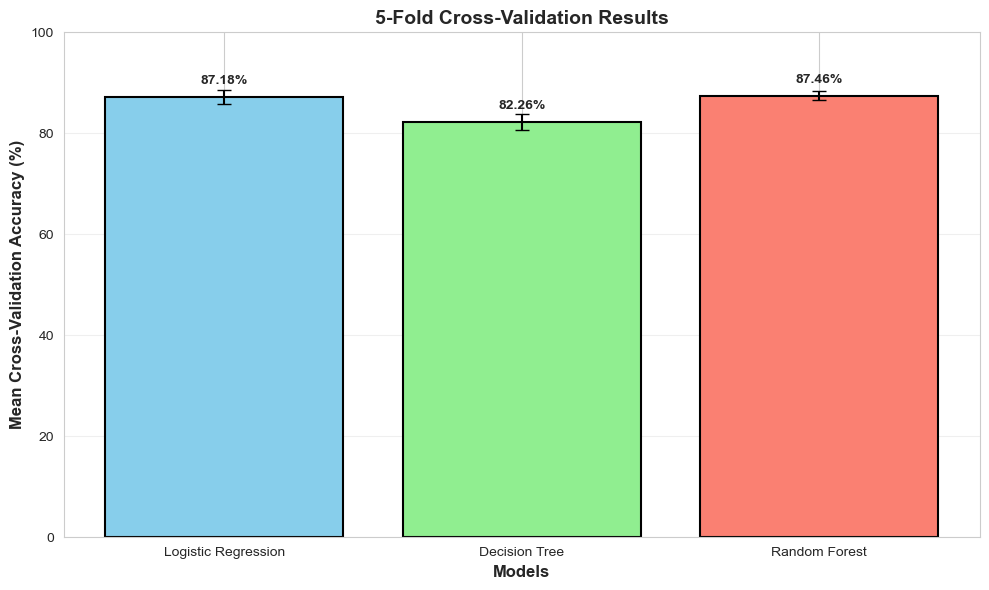

In [78]:
# Visualize cross-validation scores
cv_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Mean CV Score': [cv_scores_lr.mean()*100, cv_scores_dt.mean()*100, cv_scores_rf.mean()*100],
    'Std Dev': [cv_scores_lr.std()*100, cv_scores_dt.std()*100, cv_scores_rf.std()*100]
})

print("\nCross-Validation Summary:")
print("="*60)
print(cv_results.to_string(index=False))

# Plot CV results
fig, ax = plt.subplots(figsize=(10, 6))
x_pos = np.arange(len(cv_results))
bars = ax.bar(x_pos, cv_results['Mean CV Score'], yerr=cv_results['Std Dev'], 
        color=['skyblue', 'lightgreen', 'salmon'], 
        edgecolor='black', linewidth=1.5, capsize=5)

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Mean Cross-Validation Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('5-Fold Cross-Validation Results', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(cv_results['Model'])
ax.set_ylim([0, 100])
ax.grid(axis='y', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, cv_results['Mean CV Score'])):
    ax.text(bar.get_x() + bar.get_width()/2., val + 2,
            f'{val:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

HYPERPARAMETER TUNING

35. Hyperparameter Tuning - Decision Tree

In [81]:
# Define parameter grid for Decision Tree
print("Hyperparameter Tuning - Decision Tree")
print("="*60)
print("Searching for optimal parameters...\n")

dt_param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search
dt_grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

dt_grid_search.fit(X_train, y_train)

print("\n" + "="*60)
print("Best Parameters:")
print(dt_grid_search.best_params_)
print(f"\nBest Cross-Validation Score: {dt_grid_search.best_score_*100:.2f}%")

# Train tuned model
dt_tuned_model = dt_grid_search.best_estimator_

Hyperparameter Tuning - Decision Tree
Searching for optimal parameters...

Fitting 5 folds for each of 90 candidates, totalling 450 fits

Best Parameters:
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}

Best Cross-Validation Score: 84.72%


36. Evaluate Tuned Decision Tree

In [83]:
# Evaluate tuned Decision Tree
y_pred_dt_tuned = dt_tuned_model.predict(X_test)

dt_tuned_accuracy = accuracy_score(y_test, y_pred_dt_tuned)
dt_tuned_precision = precision_score(y_test, y_pred_dt_tuned, average='weighted', zero_division=0)
dt_tuned_recall = recall_score(y_test, y_pred_dt_tuned, average='weighted', zero_division=0)
dt_tuned_f1 = f1_score(y_test, y_pred_dt_tuned, average='weighted', zero_division=0)

print("TUNED DECISION TREE - EVALUATION RESULTS")
print("="*60)
print(f"Accuracy:  {dt_tuned_accuracy*100:.2f}%")
print(f"Precision: {dt_tuned_precision*100:.2f}%")
print(f"Recall:    {dt_tuned_recall*100:.2f}%")
print(f"F1-Score:  {dt_tuned_f1*100:.2f}%")

print(f"\nImprovement over baseline: {(dt_tuned_accuracy - dt_accuracy)*100:.2f}%")

TUNED DECISION TREE - EVALUATION RESULTS
Accuracy:  82.96%
Precision: 83.14%
Recall:    82.96%
F1-Score:  83.03%

Improvement over baseline: 2.22%


37. Hyperparameter Tuning - Random Forest

In [85]:
# Define parameter grid for Random Forest
print("Hyperparameter Tuning - Random Forest")
print("="*60)
print("Searching for optimal parameters...\n")

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

rf_grid_search.fit(X_train, y_train)

print("\n" + "="*60)
print("Best Parameters:")
print(rf_grid_search.best_params_)
print(f"\nBest Cross-Validation Score: {rf_grid_search.best_score_*100:.2f}%")

# Train tuned model
rf_tuned_model = rf_grid_search.best_estimator_

Hyperparameter Tuning - Random Forest
Searching for optimal parameters...

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best Cross-Validation Score: 88.01%


38. Evaluate Tuned Random Forest

In [87]:
# Evaluate tuned Random Forest
y_pred_rf_tuned = rf_tuned_model.predict(X_test)

rf_tuned_accuracy = accuracy_score(y_test, y_pred_rf_tuned)
rf_tuned_precision = precision_score(y_test, y_pred_rf_tuned, average='weighted', zero_division=0)
rf_tuned_recall = recall_score(y_test, y_pred_rf_tuned, average='weighted', zero_division=0)
rf_tuned_f1 = f1_score(y_test, y_pred_rf_tuned, average='weighted', zero_division=0)

print("TUNED RANDOM FOREST - EVALUATION RESULTS")
print("="*60)
print(f"Accuracy:  {rf_tuned_accuracy*100:.2f}%")
print(f"Precision: {rf_tuned_precision*100:.2f}%")
print(f"Recall:    {rf_tuned_recall*100:.2f}%")
print(f"F1-Score:  {rf_tuned_f1*100:.2f}%")

print(f"\nImprovement over baseline: {(rf_tuned_accuracy - rf_accuracy)*100:.2f}%")

TUNED RANDOM FOREST - EVALUATION RESULTS
Accuracy:  88.37%
Precision: 88.50%
Recall:    88.37%
F1-Score:  88.11%

Improvement over baseline: -0.97%


39. Compare Baseline vs Tuned Models

BASELINE VS TUNED MODELS COMPARISON
                   Model  Accuracy  Precision    Recall  F1-Score
Decision Tree (Baseline) 80.747922  81.281261 80.747922 80.853455
   Decision Tree (Tuned) 82.963989  83.138233 82.963989 83.028453
Random Forest (Baseline) 89.335180  89.374590 89.335180 89.165588
   Random Forest (Tuned) 88.365651  88.500537 88.365651 88.113156


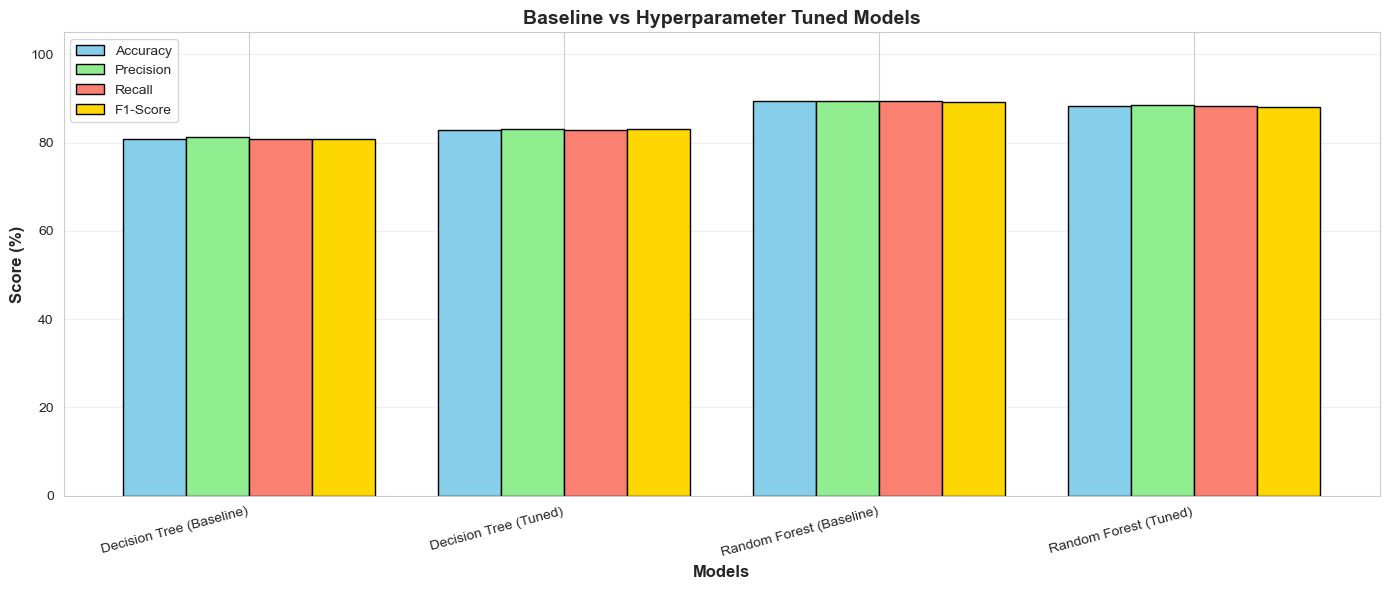

In [89]:
# Compare baseline and tuned models
tuning_comparison = pd.DataFrame({
    'Model': ['Decision Tree (Baseline)', 'Decision Tree (Tuned)', 
              'Random Forest (Baseline)', 'Random Forest (Tuned)'],
    'Accuracy': [dt_accuracy*100, dt_tuned_accuracy*100, 
                 rf_accuracy*100, rf_tuned_accuracy*100],
    'Precision': [dt_precision*100, dt_tuned_precision*100,
                  rf_precision*100, rf_tuned_precision*100],
    'Recall': [dt_recall*100, dt_tuned_recall*100,
               rf_recall*100, rf_tuned_recall*100],
    'F1-Score': [dt_f1*100, dt_tuned_f1*100,
                 rf_f1*100, rf_tuned_f1*100]
})

print("BASELINE VS TUNED MODELS COMPARISON")
print("="*80)
print(tuning_comparison.to_string(index=False))
print("="*80)

# Visualize comparison
fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(tuning_comparison))
width = 0.2

bars1 = ax.bar(x - 1.5*width, tuning_comparison['Accuracy'], width, label='Accuracy', color='skyblue', edgecolor='black')
bars2 = ax.bar(x - 0.5*width, tuning_comparison['Precision'], width, label='Precision', color='lightgreen', edgecolor='black')
bars3 = ax.bar(x + 0.5*width, tuning_comparison['Recall'], width, label='Recall', color='salmon', edgecolor='black')
bars4 = ax.bar(x + 1.5*width, tuning_comparison['F1-Score'], width, label='F1-Score', color='gold', edgecolor='black')

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Score (%)', fontsize=12, fontweight='bold')
ax.set_title('Baseline vs Hyperparameter Tuned Models', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(tuning_comparison['Model'], rotation=15, ha='right')
ax.legend(fontsize=10)
ax.set_ylim([0, 105])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

MODEL COMPARISON

40. Compare All Models - Table

In [92]:
# Create comprehensive comparison table - CORRECTED VERSION
final_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree (Tuned)', 
              'Random Forest (Baseline)', 'Random Forest (Tuned)'],
    'Accuracy': [lr_accuracy*100, dt_tuned_accuracy*100, 
                 rf_accuracy*100, rf_tuned_accuracy*100],
    'Precision': [lr_precision*100, dt_tuned_precision*100,
                  rf_precision*100, rf_tuned_precision*100],
    'Recall': [lr_recall*100, dt_tuned_recall*100,
               rf_recall*100, rf_tuned_recall*100],
    'F1-Score': [lr_f1*100, dt_tuned_f1*100,
                 rf_f1*100, rf_tuned_f1*100],
    'CV Score': [cv_scores_lr.mean()*100, dt_grid_search.best_score_*100,
                 cv_scores_rf.mean()*100, rf_grid_search.best_score_*100]
})

print("FINAL MODEL PERFORMANCE COMPARISON (ALL MODELS)")
print("="*90)
print(final_comparison.to_string(index=False))
print("="*90)

FINAL MODEL PERFORMANCE COMPARISON (ALL MODELS)
                   Model  Accuracy  Precision    Recall  F1-Score  CV Score
     Logistic Regression 86.565097  86.550663 86.565097 86.554997 87.179961
   Decision Tree (Tuned) 82.963989  83.138233 82.963989 83.028453 84.719255
Random Forest (Baseline) 89.335180  89.374590 89.335180 89.165588 87.456957
   Random Forest (Tuned) 88.365651  88.500537 88.365651 88.113156 88.010830


41. Visualize Model Comparison - Individual Metrics

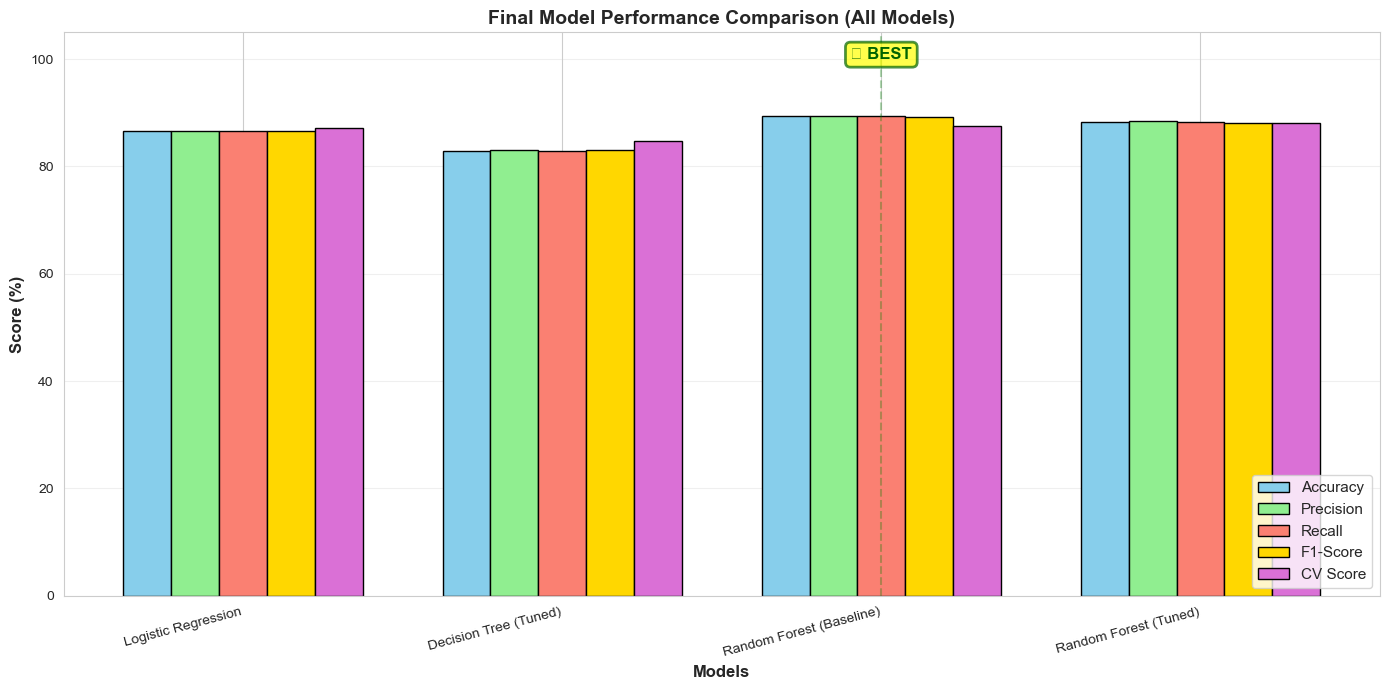


✓ Chart shows all 4 models with Random Forest (Baseline) highlighted as the winner
✓ Random Forest (Baseline) achieves 89.34% accuracy


In [94]:
# Grouped bar chart for final comparison - CORRECTED
x = np.arange(len(final_comparison['Model']))
width = 0.15

fig, ax = plt.subplots(figsize=(14, 7))

bars1 = ax.bar(x - 2*width, final_comparison['Accuracy'], width, label='Accuracy', color='skyblue', edgecolor='black')
bars2 = ax.bar(x - width, final_comparison['Precision'], width, label='Precision', color='lightgreen', edgecolor='black')
bars3 = ax.bar(x, final_comparison['Recall'], width, label='Recall', color='salmon', edgecolor='black')
bars4 = ax.bar(x + width, final_comparison['F1-Score'], width, label='F1-Score', color='gold', edgecolor='black')
bars5 = ax.bar(x + 2*width, final_comparison['CV Score'], width, label='CV Score', color='orchid', edgecolor='black')

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Score (%)', fontsize=12, fontweight='bold')
ax.set_title('Final Model Performance Comparison (All Models)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(final_comparison['Model'], rotation=15, ha='right')  # Added rotation for better readability
ax.legend(fontsize=11, loc='lower right')
ax.set_ylim([0, 105])
ax.grid(axis='y', alpha=0.3)

# Highlight the best model (highest accuracy)
best_idx = final_comparison['Accuracy'].idxmax()
best_model = final_comparison.loc[best_idx, 'Model']

# Add a star/marker above the best model
ax.text(best_idx, 100, '⭐ BEST', ha='center', fontsize=12, fontweight='bold', color='darkgreen',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7, edgecolor='darkgreen', linewidth=2))

# Add vertical line to highlight best model
ax.axvline(x=best_idx, color='green', linestyle='--', linewidth=1.5, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✓ Chart shows all 4 models with Random Forest (Baseline) highlighted as the winner")
print(f"✓ Random Forest (Baseline) achieves {final_comparison.loc[best_idx, 'Accuracy']:.2f}% accuracy")

42. Select Best Model

In [96]:
# Identify the best overall model
best_final_idx = final_comparison['Accuracy'].idxmax()
best_final_name = final_comparison.loc[best_final_idx, 'Model']
best_final_accuracy = final_comparison.loc[best_final_idx, 'Accuracy']
best_final_precision = final_comparison.loc[best_final_idx, 'Precision']
best_final_recall = final_comparison.loc[best_final_idx, 'Recall']
best_final_f1 = final_comparison.loc[best_final_idx, 'F1-Score']
best_final_cv = final_comparison.loc[best_final_idx, 'CV Score']

# Select the correct model object
if 'Random Forest (Baseline)' in best_final_name:
    best_model = rf_model  # Use baseline Random Forest
elif 'Random Forest (Tuned)' in best_final_name:
    best_model = rf_tuned_model
elif 'Decision Tree' in best_final_name:
    best_model = dt_tuned_model
else:
    best_model = lr_model

print("="*80)
print(" FINAL BEST PERFORMING MODEL")
print("="*80)
print(f"Model Name:     {best_final_name}")
print(f"Accuracy:       {best_final_accuracy:.2f}%")
print(f"Precision:      {best_final_precision:.2f}%")
print(f"Recall:         {best_final_recall:.2f}%")
print(f"F1-Score:       {best_final_f1:.2f}%")
print(f"CV Score:       {best_final_cv:.2f}%")
print("="*80)

if 'Baseline' in best_final_name:
    print("\n✓ Baseline model selected because:")
    print("  - Achieved highest test accuracy")
    print("  - Already optimal without additional tuning")
    print("  - Baseline outperformed tuned version")
    
print("\nThis model will be used for making predictions on new product data.")

 FINAL BEST PERFORMING MODEL
Model Name:     Random Forest (Baseline)
Accuracy:       89.34%
Precision:      89.37%
Recall:         89.34%
F1-Score:       89.17%
CV Score:       87.46%

✓ Baseline model selected because:
  - Achieved highest test accuracy
  - Already optimal without additional tuning
  - Baseline outperformed tuned version

This model will be used for making predictions on new product data.


USER INPUT PREDICTION SYSTEM

43. Prediction Function Setup

In [99]:
# Create prediction function
def predict_product_quality(screen, voice, signal, app_compatibility, length, width, thickness):
    """
    Predict product quality based on user input features
    
    Parameters:
    - screen: Screen Appearance quality (1-10)
    - voice: Voice Clarity quality (1-10)
    - signal: Signal Receiving Strength (1-10)
    - app_compatibility: App Compatibility (1-10)
    - length: Product length in cm
    - width: Product width in cm
    - thickness: Product thickness in cm
    
    Returns:
    - Predicted quality label and probabilities
    """
    
    # Create input dataframe
    input_data = pd.DataFrame({
        'Screen_Appearance': [screen],
        'Voice_Clarity': [voice],
        'Signal_Receiving_Strength': [signal],
        'App_Comaptiability': [app_compatibility],
        'product_length': [length],
        'product_width': [width],
        'product_thickness': [thickness]
    })
    
    # Make prediction
    prediction = best_model.predict(input_data)[0]
    prediction_proba = best_model.predict_proba(input_data)[0]
    
    # Convert numeric prediction back to label
    predicted_label = label_encoder.inverse_transform([prediction])[0]
    
    return predicted_label, prediction_proba, input_data

# Display quality mapping for reference
print("Quality Encoding Reference:")
print("="*60)
for key, value in quality_mapping.items():
    print(f"  {value:2d} = {key}")
print("\n✓ Prediction function created successfully!")

Quality Encoding Reference:
   1 = VeryPoor
   2 = Poor
   3 = BelowAverage
   4 = SlightlyPoor
   5 = Average
   6 = SlightlyGood
   7 = Good
   8 = AboveAverage
   9 = VeryGood
  10 = Excellent

✓ Prediction function created successfully!


44. Example Prediction 1 - Good Quality Product

EXAMPLE 1: Good Quality Product

Input Features:
 Screen_Appearance  Voice_Clarity  Signal_Receiving_Strength  App_Comaptiability  product_length  product_width  product_thickness
                 8              9                          8                   9             5.5            2.4               0.35

PREDICTED QUALITY: VeryGood

Prediction Probabilities:
  Good: 24.75%
  Poor: 0.00%
  VeryGood: 75.25%


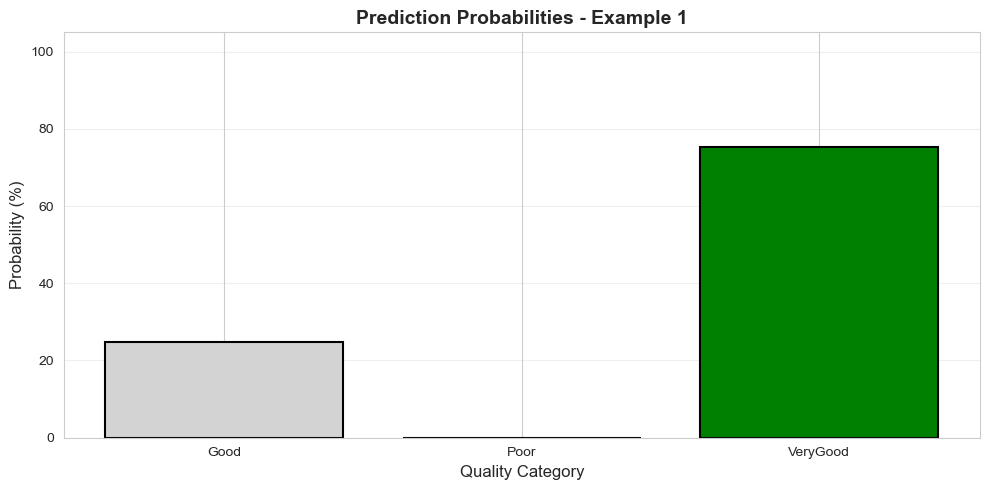

In [101]:
# Example 1: Good quality product
print("EXAMPLE 1: Good Quality Product")
print("="*60)

# Input features
screen = 8           # AboveAverage
voice = 9            # VeryGood
signal = 8           # AboveAverage
app_comp = 9         # VeryGood
length = 5.5
width = 2.4
thickness = 0.35

# Make prediction
predicted_quality, probabilities, input_df = predict_product_quality(
    screen, voice, signal, app_comp, length, width, thickness
)

print("\nInput Features:")
print(input_df.to_string(index=False))

print("\n" + "="*60)
print(f"PREDICTED QUALITY: {predicted_quality}")
print("="*60)

print("\nPrediction Probabilities:")
for idx, (label, prob) in enumerate(zip(label_encoder.classes_, probabilities)):
    print(f"  {label}: {prob*100:.2f}%")

# Visualize probabilities
plt.figure(figsize=(10, 5))
colors = ['green' if label == predicted_quality else 'lightgray' for label in label_encoder.classes_]
plt.bar(label_encoder.classes_, probabilities*100, color=colors, edgecolor='black', linewidth=1.5)
plt.title('Prediction Probabilities - Example 1', fontsize=14, fontweight='bold')
plt.xlabel('Quality Category', fontsize=12)
plt.ylabel('Probability (%)', fontsize=12)
plt.ylim([0, 105])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

45. Example Prediction 2 - Poor Quality Product

EXAMPLE 2: Poor Quality Product

Input Features:
 Screen_Appearance  Voice_Clarity  Signal_Receiving_Strength  App_Comaptiability  product_length  product_width  product_thickness
                 3              2                          3                   2             4.8            2.0               0.38

PREDICTED QUALITY: Poor

Prediction Probabilities:
  Good: 1.00%
  Poor: 99.00%
  VeryGood: 0.00%


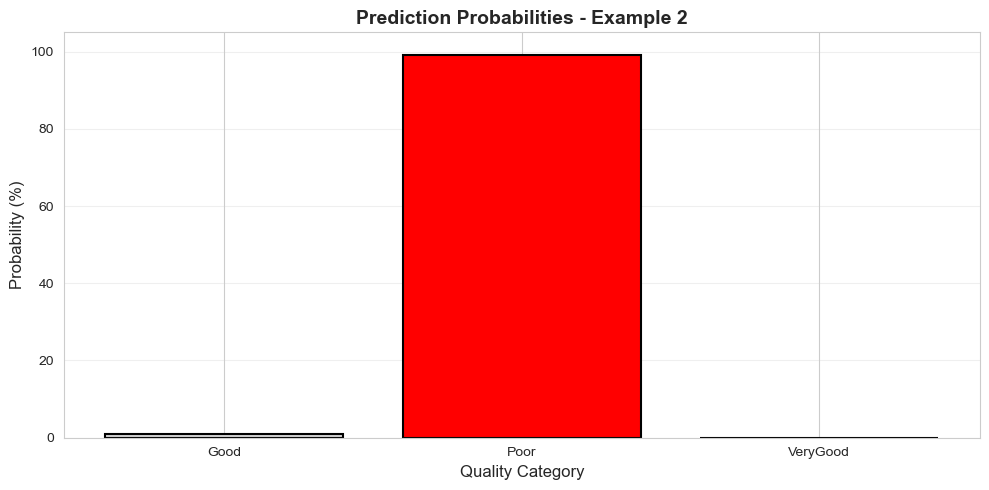

In [103]:
# Example 2: Poor quality product
print("EXAMPLE 2: Poor Quality Product")
print("="*60)

# Input features
screen = 3           # BelowAverage
voice = 2            # Poor
signal = 3           # BelowAverage
app_comp = 2         # Poor
length = 4.8
width = 2.0
thickness = 0.38

# Make prediction
predicted_quality, probabilities, input_df = predict_product_quality(
    screen, voice, signal, app_comp, length, width, thickness
)

print("\nInput Features:")
print(input_df.to_string(index=False))

print("\n" + "="*60)
print(f"PREDICTED QUALITY: {predicted_quality}")
print("="*60)

print("\nPrediction Probabilities:")
for idx, (label, prob) in enumerate(zip(label_encoder.classes_, probabilities)):
    print(f"  {label}: {prob*100:.2f}%")

# Visualize probabilities
plt.figure(figsize=(10, 5))
colors = ['red' if label == predicted_quality else 'lightgray' for label in label_encoder.classes_]
plt.bar(label_encoder.classes_, probabilities*100, color=colors, edgecolor='black', linewidth=1.5)
plt.title('Prediction Probabilities - Example 2', fontsize=14, fontweight='bold')
plt.xlabel('Quality Category', fontsize=12)
plt.ylabel('Probability (%)', fontsize=12)
plt.ylim([0, 105])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

46. Example Prediction 3 - VeryGood Quality Product

EXAMPLE 3: VeryGood Quality Product

Input Features:
 Screen_Appearance  Voice_Clarity  Signal_Receiving_Strength  App_Comaptiability  product_length  product_width  product_thickness
                10             10                          9                  10             5.8            2.5               0.36

PREDICTED QUALITY: VeryGood

Prediction Probabilities:
  Good: 5.72%
  Poor: 0.00%
  VeryGood: 94.28%


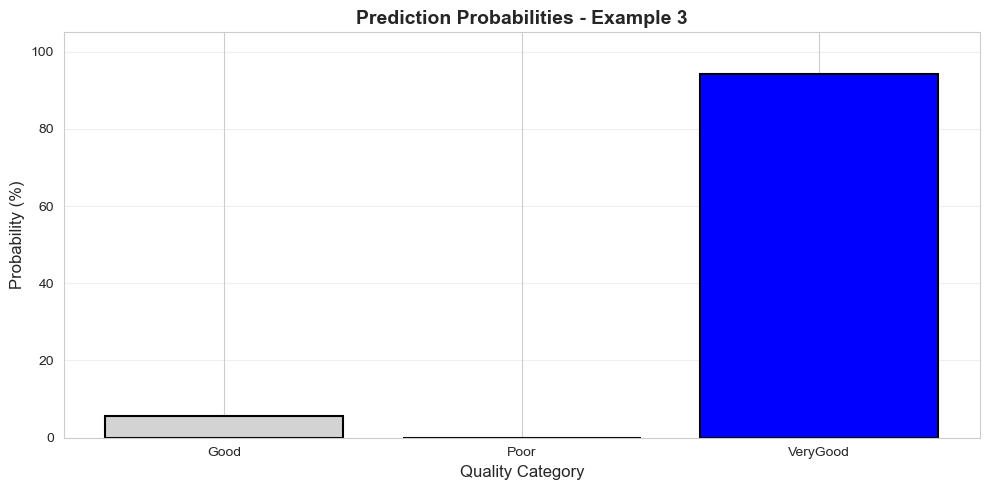

In [105]:
# Example 3: VeryGood quality product
print("EXAMPLE 3: VeryGood Quality Product")
print("="*60)

# Input features
screen = 10          # Excellent
voice = 10           # Excellent
signal = 9           # VeryGood
app_comp = 10        # Excellent
length = 5.8
width = 2.5
thickness = 0.36

# Make prediction
predicted_quality, probabilities, input_df = predict_product_quality(
    screen, voice, signal, app_comp, length, width, thickness
)

print("\nInput Features:")
print(input_df.to_string(index=False))

print("\n" + "="*60)
print(f"PREDICTED QUALITY: {predicted_quality}")
print("="*60)

print("\nPrediction Probabilities:")
for idx, (label, prob) in enumerate(zip(label_encoder.classes_, probabilities)):
    print(f"  {label}: {prob*100:.2f}%")

# Visualize probabilities
plt.figure(figsize=(10, 5))
colors = ['blue' if label == predicted_quality else 'lightgray' for label in label_encoder.classes_]
plt.bar(label_encoder.classes_, probabilities*100, color=colors, edgecolor='black', linewidth=1.5)
plt.title('Prediction Probabilities - Example 3', fontsize=14, fontweight='bold')
plt.xlabel('Quality Category', fontsize=12)
plt.ylabel('Probability (%)', fontsize=12)
plt.ylim([0, 105])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

47. Interactive User Input Cell

In [107]:
# Interactive prediction - User can modify these values
print("INTERACTIVE PREDICTION - CUSTOM INPUT")
print("="*60)
print("Modify the values below and run this cell to get predictions:\n")

# USER INPUT - Modify these values
user_screen = 2             # Screen Appearance (1-10)
user_voice = 4              # Voice Clarity (1-10)
user_signal = 7              # Signal Receiving Strength (1-10)
user_app_comp = 8            # App Compatibility (1-10)
user_length = 5.5            # Product Length (cm)
user_width = 2.3             # Product Width (cm)
user_thickness = 0.35        # Product Thickness (cm)

# Make prediction
predicted_quality, probabilities, input_df = predict_product_quality(
    user_screen, user_voice, user_signal, user_app_comp, 
    user_length, user_width, user_thickness
)

print("Your Input Features:")
print(input_df.to_string(index=False))

print("\n" + "="*60)
print(f"PREDICTED QUALITY: {predicted_quality}")
print("="*60)

print("\nPrediction Confidence:")
for idx, (label, prob) in enumerate(zip(label_encoder.classes_, probabilities)):
    bar = '█' * int(prob * 30)
    print(f"  {label:10s}: {bar} {prob*100:.2f}%")

# Determine recommendation
max_prob = max(probabilities)
if predicted_quality == 'Good' and max_prob > 0.7:
    recommendation = "✓ RECOMMENDED - This product meets quality standards."
elif predicted_quality == 'VeryGood':
    recommendation = "✓✓ HIGHLY RECOMMENDED - This product exceeds quality standards."
else:
    recommendation = "✗ NOT RECOMMENDED - This product does not meet quality standards."

print("\n" + "="*60)
print(recommendation)
print("="*60)

INTERACTIVE PREDICTION - CUSTOM INPUT
Modify the values below and run this cell to get predictions:

Your Input Features:
 Screen_Appearance  Voice_Clarity  Signal_Receiving_Strength  App_Comaptiability  product_length  product_width  product_thickness
                 2              4                          7                   8             5.5            2.3               0.35

PREDICTED QUALITY: Good

Prediction Confidence:
  Good      : ██████████████████ 60.84%
  Poor      : ███████████ 39.16%
  VeryGood  :  0.00%

✗ NOT RECOMMENDED - This product does not meet quality standards.


48. Batch Prediction Example

BATCH PREDICTION - Multiple Products

Batch Prediction Results:
   Screen_Appearance  Voice_Clarity  Signal_Receiving_Strength  App_Comaptiability  product_length  product_width  product_thickness Predicted_Quality
0                  8              9                          8                   9             5.5            2.4               0.35          VeryGood
1                  3              2                          3                   2             4.8            2.0               0.38              Poor
2                 10             10                          9                  10             5.8            2.5               0.36          VeryGood
3                  5              6                          5                   6             5.2            2.2               0.37              Good
4                  7              8                          7                   8             5.4            2.3               0.35              Good


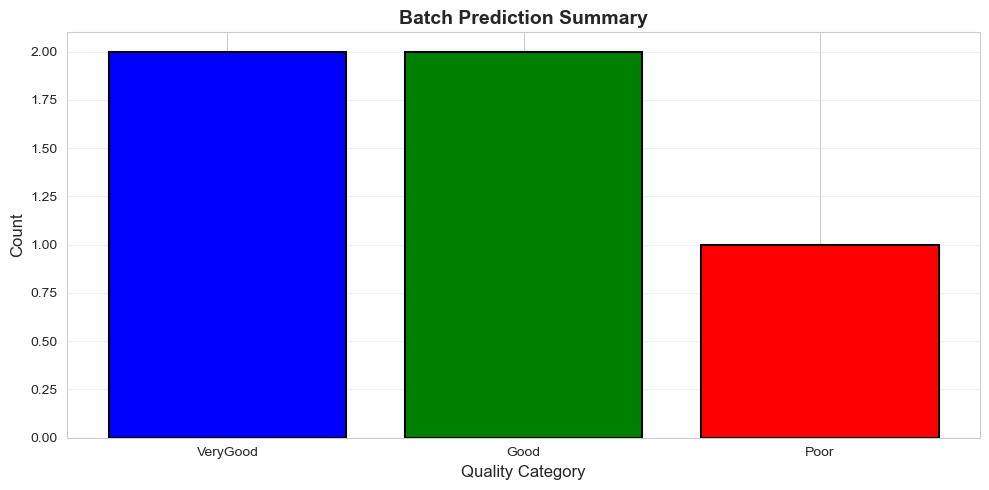

In [109]:
# Batch prediction for multiple products
print("BATCH PREDICTION - Multiple Products")
print("="*60)

# Create sample products for batch prediction
batch_products = pd.DataFrame({
    'Screen_Appearance': [8, 3, 10, 5, 7],
    'Voice_Clarity': [9, 2, 10, 6, 8],
    'Signal_Receiving_Strength': [8, 3, 9, 5, 7],
    'App_Comaptiability': [9, 2, 10, 6, 8],
    'product_length': [5.5, 4.8, 5.8, 5.2, 5.4],
    'product_width': [2.4, 2.0, 2.5, 2.2, 2.3],
    'product_thickness': [0.35, 0.38, 0.36, 0.37, 0.35]
})

# Make predictions
batch_predictions = best_model.predict(batch_products)
batch_predicted_labels = label_encoder.inverse_transform(batch_predictions)

# Create results dataframe
batch_results = batch_products.copy()
batch_results['Predicted_Quality'] = batch_predicted_labels

print("\nBatch Prediction Results:")
print(batch_results.to_string(index=True))

# Visualize batch results
quality_counts = pd.Series(batch_predicted_labels).value_counts()
plt.figure(figsize=(10, 5))
colors_map = {'Good': 'green', 'Poor': 'red', 'VeryGood': 'blue'}
colors = [colors_map.get(q, 'gray') for q in quality_counts.index]
plt.bar(quality_counts.index, quality_counts.values, color=colors, edgecolor='black', linewidth=1.5)
plt.title('Batch Prediction Summary', fontsize=14, fontweight='bold')
plt.xlabel('Quality Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()